# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Sri Namira Putri Harnoko
- **Email:** srinamira0@gmail.com
- **ID Dicoding:** sri_namira_putri_h

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana distribusi casual user dan registered user saat hari kerja?
- Pertanyaan 2 : Apakah jumlah casual user dan registered meningkat selama bulan tertentu dibandingkan dengan bulan lainnya?
- Pertanyaan 3 : Apakah terdapat jam tertentu dengan penggunaan sepeda tertinggi dan terendah?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
day_data = pd.read_csv('data\day.csv')
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hour_data = pd.read_csv('data/hour.csv')
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dari pengamatan awal data day.csv dan hour.csv, terlihat bahwa dataset mencakup beberapa variabel seperti season, temp, cnt (jumlah penggunaan sepeda), weekday, workingday, dan weathersit (situasi cuaca). Variabel-variabel ini penting untuk melihat bagaimana pola penggunaan sepeda dipengaruhi oleh berbagai faktor, seperti musim, cuaca, dan hari dalam seminggu.
- day.csv berisi data harian sedangkan hour.csv berisi data per jam. Ini berarti kita dapat melakukan analisis yang lebih mendalam pada waktu-waktu tertentu, misalnya, perbandingan antara penggunaan sepeda pada pagi dan sore hari.

### Assessing Data

#### **day_data**

In [6]:
# Mengecek informasi umum dataset
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
# Mengecek missing values
print(day_data.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [8]:
print("Jumlah duplikasi: ", day_data.duplicated().sum())

Jumlah duplikasi:  0


#### **hour_data**

In [9]:
# Mengecek informasi umum dataset
print(hour_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [10]:
# Mengecek missing values
print(hour_data.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [11]:
print("Jumlah duplikasi: ", hour_data.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Tidak ada missing value di dataset ini, yang berarti tidak ada data yang hilang dan kita dapat melanjutkan ke tahap pembersihan tanpa perlu menangani nilai-nilai yang kosong. Tidak ada duplikasi pada dataset yang digunakan.

### Cleaning Data

#### **day_data**

- Mengubah tipe data kolom dteday dari object menjadi datetime

In [12]:
day_data['dteday'] = pd.to_datetime(day_data['dteday'])

In [13]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

- Mengonversi season dari numerik menjadi kategorik (Spring, Summer, Fall, Winter)

In [14]:
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_data['season'] = day_data['season'].map(season_mapping)

- Mengonversi yr dari numerik menjadi kategorik (2011, 2012)

In [15]:
year_mapping = {0: '2011', 1: '2012'}
day_data['yr'] = day_data['yr'].map(year_mapping)

- Mengonversi mnth dari numerik menjadi kategorik
(January, February, March, April, May, June, July, August, September, October, November, December)

In [16]:
month_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December',}
day_data['mnth'] = day_data['mnth'].map(month_mapping)

- Mengonversi holiday dari numerik menjadi kategorik (No, Yes)

In [17]:
# Mengonversi holiday dari numerik menjadi kategorik (No, Yes)
holiday_mapping = {0: 'No', 1: 'Yes'}
day_data['holiday'] = day_data['holiday'].map(holiday_mapping)

- Mengonversi weekday dari numerik menjadi kategorik (Sunday, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday)

In [18]:
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
day_data['weekday'] = day_data['weekday'].map(weekday_mapping)

- Mengonversi workingday dari numerik menjadi kategorik (No, Yes)

In [19]:
workingday_mapping = {0: 'No', 1: 'Yes'}
day_data['workingday'] = day_data['workingday'].map(workingday_mapping)

- Mengonversi weathersit dari numerik menjadi kategorik (Clear, Mist, Light Snow, Heavy Rain)

In [20]:
weather_mapping = {1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'}
day_data['weathersit'] = day_data['weathersit'].map(weather_mapping)

In [21]:
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,No,Saturday,No,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,No,Sunday,No,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,No,Monday,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,No,Tuesday,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,No,Wednesday,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### **hour_data**

- Mengubah tipe data kolom dteday dari object menjadi datetime

In [22]:
hour_data['dteday'] = pd.to_datetime(day_data['dteday'])

In [23]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

- Mengonversi season dari numerik menjadi kategorik (Spring, Summer, Fall, Winter)

In [24]:
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
hour_data['season'] = hour_data['season'].map(season_mapping)

- Mengonversi yr dari numerik menjadi kategorik (2011, 2012)

In [25]:
year_mapping = {0: '2011', 1: '2012'}
hour_data['yr'] = hour_data['yr'].map(year_mapping)

- Mengonversi mnth dari numerik menjadi kategorik (January, February, March, April, May, June, July, August, September, October, November, December)

In [26]:
month_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December',}
hour_data['mnth'] = hour_data['mnth'].map(month_mapping)

- Mengonversi holiday dari numerik menjadi kategorik (No, Yes)

In [27]:
# Mengonversi holiday dari numerik menjadi kategorik (No, Yes)
holiday_mapping = {0: 'No', 1: 'Yes'}
hour_data['holiday'] = hour_data['holiday'].map(holiday_mapping)

- Mengonversi weekday dari numerik menjadi kategorik (Sunday, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday)

In [28]:
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
hour_data['weekday'] = hour_data['weekday'].map(weekday_mapping)

- Mengonversi workingday dari numerik menjadi kategorik (No, Yes)

In [29]:
workingday_mapping = {0: 'No', 1: 'Yes'}
hour_data['workingday'] = hour_data['workingday'].map(workingday_mapping)

- Mengonversi weathersit dari numerik menjadi kategorik (Clear, Mist, Light Snow, Heavy Rain)

In [30]:
weather_mapping = {1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'}
hour_data['weathersit'] = hour_data['weathersit'].map(weather_mapping)

In [31]:
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,No,Saturday,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-02,Spring,2011,January,1,No,Saturday,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-03,Spring,2011,January,2,No,Saturday,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-04,Spring,2011,January,3,No,Saturday,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-05,Spring,2011,January,4,No,Saturday,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

#### **day_data**

In [32]:
day_data.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,January,No,Saturday,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Berdasarkan statistik deskriptif diatas, didapatkan bahwa pengguna lebih banyak menggunakan Bike Sharing pada musim gugur tahun 2012, di bulan Januari, hari Sabtu, pada hari kerja, dan cuaca yang cerah.

In [33]:
day_data.groupby(by="mnth").agg({
    "instant": "nunique",
    "casual": "sum",
    "registered": "sum",
    "cnt": ["max", "min", "mean", "sum"]
})

instant casual registered   cnt                           
          nunique    sum        sum   max   min         mean     sum
mnth                                                                
April          60  60802     208292  7460   795  4484.900000  269094
August         62  72039     279155  7865  1115  5664.419355  351194
December       62  21693     189343  6606   441  3403.806452  211036
February       57  14963     136389  5062  1005  2655.298246  151352
January        62  12042     122891  4521   431  2176.338710  134933
July           62  78157     266791  8173  3285  5563.677419  344948
June           60  73906     272436  8120  3767  5772.366667  346342
March          62  44444     184476  8362   605  3692.258065  228920
May            62  75285     256401  8294  2633  5349.774194  331686
November       60  36603     218228  6852  1495  4247.183333  254831
October        62  59760     262592  8156    22  5199.225806  322352
September      60  70323     275668  8714  1842  5766.516667  345991


Berdasarkan pivot table di atas, dapat diketahui bahwa jumlah sewa sepeda (cnt) paling tinggi terjadi pada bulan-bulan seperti Agustus, Juni, Juli, dan September. Rata-rata sewa sepeda (mean) tertinggi terjadi pada bulan Juni dan September, yaitu sekitar 5772 hingga 5766 sewa. Selain itu, distribusi jumlah sewa sepeda di berbagai bulan menunjukkan kecenderungan tinggi pada bulan-bulan musim panas seperti Juni, Juli, Agustus, dan September, sementara bulan-bulan lainnya seperti Desember dan Januari memiliki jumlah sewa yang lebih rendah.

In [34]:
# Mengelompokan day_data berdasarkan kolom season pertahunnya lalu menghitung jumlah nilai pada kolom registered dan casual
day_data.groupby(by=["yr", "season"]).agg({
    "casual": "sum",
    "registered": "sum"
})

casual  registered
yr   season                    
2011 Fall     95450      324200
     Spring   21425      128575
     Summer   77564      269752
     Winter   52813      273324
2012 Fall    130641      510838
     Spring   39197      282151
     Summer  125958      445315
     Winter   76969      438507


Tabel di atas menunjukkan jumlah sewa sepeda untuk pengguna casual dan registered berdasarkan tahun (2011 dan 2012) dan musim (Fall, Spring, Summer, Winter). Pada tahun 2012, jumlah sewa sepeda untuk kedua kategori meningkat signifikan dibandingkan tahun 2011, terutama pada musim gugur dan musim panas.

#### **hour_data**

In [35]:
hour_data.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,731,17379,17379,17379,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,12,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,July,NaN,No,Saturday,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,1488,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-01 00:00:00,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-02 12:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-01 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-01 12:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [36]:
# Kelompokan pengguna kasual dan register berdasarkan weekday
hour_data.groupby(by="weekday").agg({
    "casual": "sum",
    "registered": "sum"
})

,casual,registered
weekday,,
Friday,78238,409552
Monday,70784,384719
Saturday,153852,323955
Sunday,140521,303506
Thursday,61460,423935
Tuesday,57843,411266
Wednesday,57319,415729


In [37]:
# Mengelompokan jumlah pengguna berdasarkan workingday dan holiday
hour_data.groupby(by=["workingday", "holiday"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": ["sum", "mean"]
})

casual registered      cnt            
                       sum        sum      sum        mean
workingday holiday                                        
No         No       294373     627461   921834  183.852014
           Yes       22359      56076    78435  156.870000
Yes        No       303285    1989125  2292410  193.207754

Tabel di atas menunjukkan jumlah total sewa sepeda (cnt) untuk kategori kasual (casual) dan terdaftar (registered) berdasarkan status hari kerja (workingday) dan libur (holiday). Secara keseluruhan, sewa sepeda lebih tinggi pada hari kerja (Yes, No) dengan rata-rata sewa tertinggi mencapai 193.21, sementara hari libur (No, No) memiliki rata-rata yang lebih rendah.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana distribusi casual user dan registered user saat hari kerja?

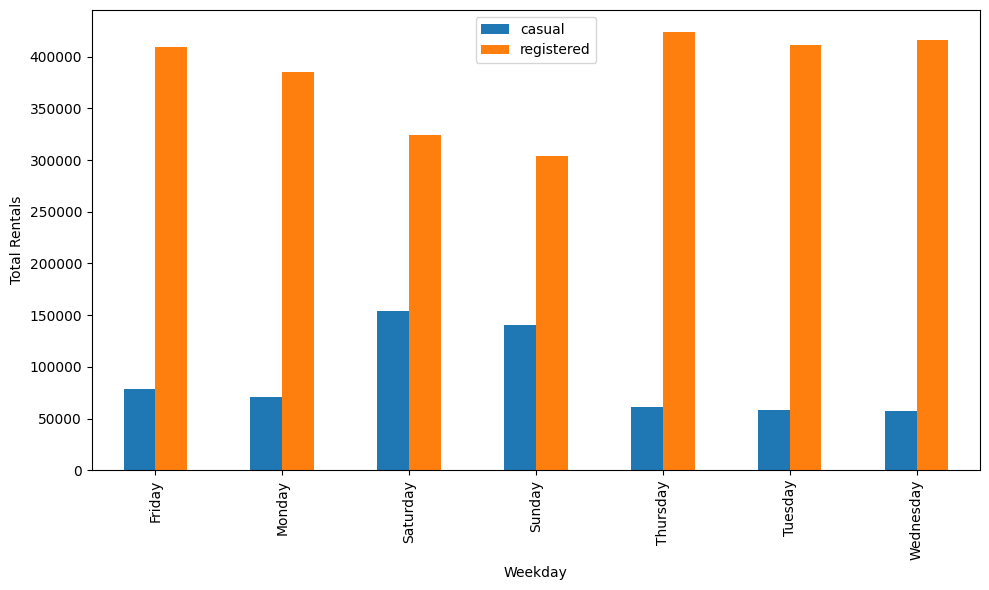

In [38]:
season_usage = day_data.groupby(['weekday'])[['casual', 'registered']].sum()
season_usage.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Weekday')
plt.ylabel('Total Rentals')
plt.tight_layout()
plt.show()

Didapatkan bahwa jumlah registered user jauh melebihi casual user yang menggunakan sepeda pada hari kerja (weekday). Ini mungkin terjadi karena registered user memiliki kebutuhan rutin dan berlangganan menggunakan Bike Sharing ini. Perbedaan signifikan ini dapat memberikan wawasan tentang kebiasaan penggunaan sepeda antara casual dan registered user pada hari kerja.

### Pertanyaan 2: Apakah jumlah casual user dan registered meningkat selama bulan tertentu dibandingkan dengan bulan lainnya?

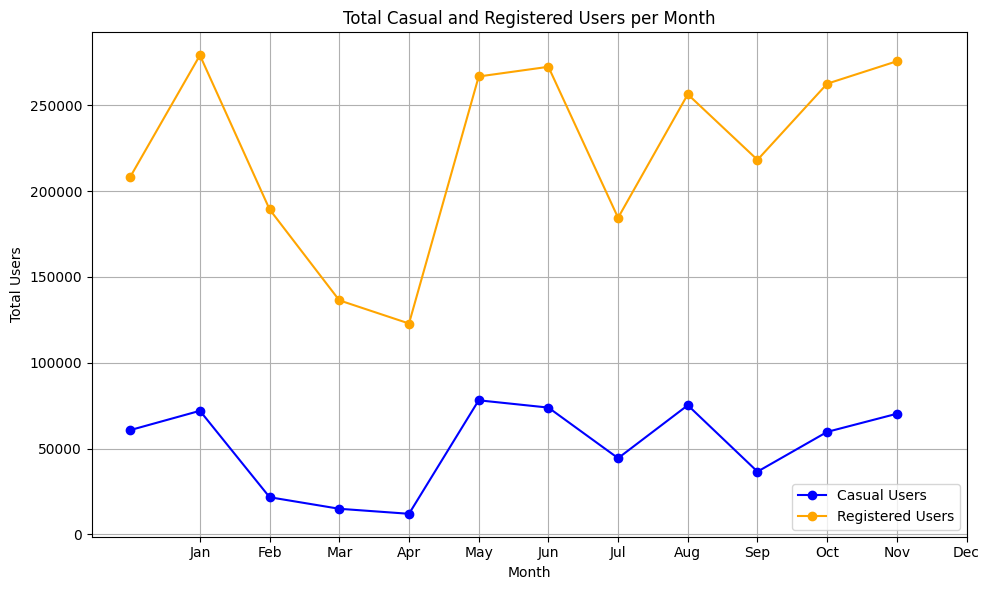

In [39]:
monthly_casual_usage = day_data.groupby('mnth')['casual'].sum()
monthly_registered_usage = day_data.groupby('mnth')['registered'].sum()

plt.figure(figsize=(10, 6))
# Plot for Casual Users
monthly_casual_usage.plot(kind='line', marker='o', label='Casual Users', color='blue')
# Plot for Registered Users
monthly_registered_usage.plot(kind='line', marker='o', label='Registered Users', color='orange')

# Customizing the plot
plt.title('Total Casual and Registered Users per Month')
plt.xlabel('Month')
plt.ylabel('Total Users')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


Terlihat bahwa jumlah registered user lebih tinggi dibandingkan casual user dengan puncak tertinggi terjadi pada bulan Januari. Pola fluktuasi kedua jenis pengguna cenderung mirip, di mana terjadi penurunan signifikan dari Januari hingga April, kemudian meningkat kembali pada Mei, dan berfluktuasi relatif stabil hingga akhir tahun.

### Pertanyaan 3: Apakah terdapat jam tertentu dengan penggunaan sepeda tertinggi dan terendah?

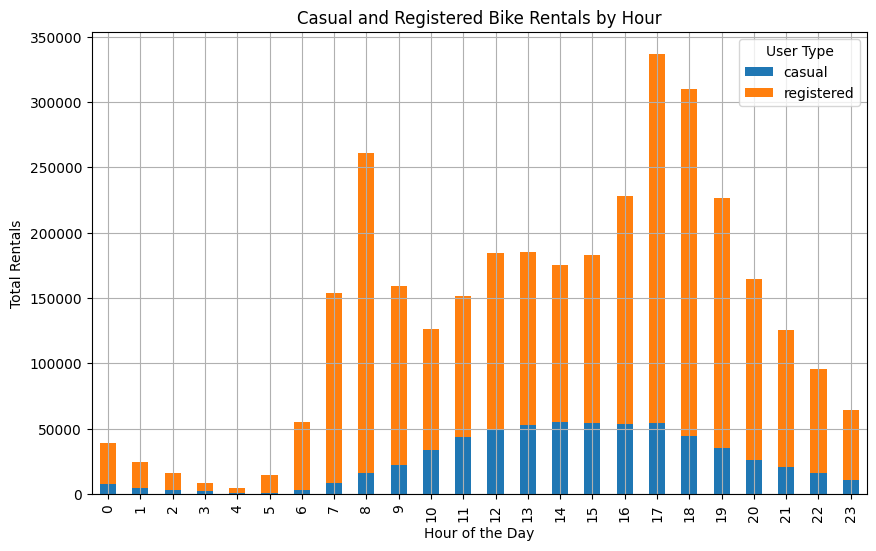

In [40]:
# Grouping by hour and summing up casual and registered rentals
hourly_split = hour_data.groupby('hr')[['casual', 'registered']].sum()

# Plotting stacked bar chart
hourly_split.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Casual and Registered Bike Rentals by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Rentals')
plt.legend(title='User Type')
plt.grid(True)
plt.show()

Penggunaan sepeda tertinggi terjadi pada jam 17 (5 sore), dimana sebagian besar adalah registered user. Penggunaan sepeda terendah terjadi pada jam 4 pagi. Ini menunjukkan aktivitas yang sangat minimal di waktu dini hari.

## Analisis Lanjutan (Opsional)

In [41]:
def create_manual_clusters(day_data, hour_data):
    """
    Create manual clusters based on different features for both daily and hourly data
    """
    # Daily Data Clustering

    # 1. Season-based clustering
    day_season_groups = day_data.groupby('season').agg({
        'casual': 'mean',
        'registered': 'mean',
        'cnt': 'mean'
    }).round(2)

    # 2. Weather-based clustering
    day_weather_groups = day_data.groupby('weathersit').agg({
        'casual': 'mean',
        'registered': 'mean',
        'cnt': 'mean'
    }).round(2)

    # 3. Workingday vs Non-workingday clustering
    day_workingday_groups = day_data.groupby('workingday').agg({
        'casual': 'mean',
        'registered': 'mean',
        'cnt': 'mean'
    }).round(2)

    # Hourly Data Clustering

    # 1. Time of day clustering
    hour_data['time_of_day'] = pd.cut(hour_data['hr'],
                                     bins=[0, 6, 12, 18, 23],
                                     labels=['Night', 'Morning', 'Afternoon', 'Evening'])

    hour_timeofday_groups = hour_data.groupby('time_of_day').agg({
        'casual': 'mean',
        'registered': 'mean',
        'cnt': 'mean'
    }).round(2)

    # 2. Temperature-based clustering
    hour_data['temp_category'] = pd.cut(hour_data['temp'],
                                      bins=[-np.inf, 0.3, 0.6, np.inf],
                                      labels=['Cool', 'Moderate', 'Hot'])

    hour_temp_groups = hour_data.groupby('temp_category').agg({
        'casual': 'mean',
        'registered': 'mean',
        'cnt': 'mean'
    }).round(2)

    # 3. Rush hour clustering
    hour_data['is_rush_hour'] = hour_data['hr'].apply(
        lambda x: 1 if x in [8, 9, 17, 18] else 0
    )

    hour_rush_groups = hour_data.groupby('is_rush_hour').agg({
        'casual': 'mean',
        'registered': 'mean',
        'cnt': 'mean'
    }).round(2)

    # Return all clustering results
    clustering_results = {
        'daily': {
            'season': day_season_groups,
            'weather': day_weather_groups,
            'workingday': day_workingday_groups
        },
        'hourly': {
            'time_of_day': hour_timeofday_groups,
            'temperature': hour_temp_groups,
            'rush_hour': hour_rush_groups
        }
    }

    return clustering_results

# Example usage:
# clusters = create_manual_clusters(day_data, hour_data)

# Print results example:
def print_clustering_results(clusters):
    """
    Print formatted clustering results
    """
    print("\nDAILY DATA CLUSTERS")
    print("-" * 50)

    for cluster_type, data in clusters['daily'].items():
        print(f"\n{cluster_type.upper()} BASED CLUSTERING:")
        print(data)
        print("-" * 50)

    print("\nHOURLY DATA CLUSTERS")
    print("-" * 50)

    for cluster_type, data in clusters['hourly'].items():
        print(f"\n{cluster_type.upper()} BASED CLUSTERING:")
        print(data)
        print("-" * 50)

clusters = create_manual_clusters(day_data, hour_data)
print_clustering_results(clusters)


DAILY DATA CLUSTERS
--------------------------------------------------

SEASON BASED CLUSTERING:
         casual  registered      cnt
season                              
Fall    1202.61     4441.69  5644.30
Spring   334.93     2269.20  2604.13
Summer  1106.10     3886.23  4992.33
Winter   729.11     3999.05  4728.16
--------------------------------------------------

WEATHER BASED CLUSTERING:
            casual  registered      cnt
weathersit                             
Clear       964.03     3912.76  4876.79
Light Snow  185.48     1617.81  1803.29
Mist        687.35     3348.51  4035.86
--------------------------------------------------

WORKINGDAY BASED CLUSTERING:
             casual  registered      cnt
workingday                              
No          1371.13     2959.03  4330.17
Yes          606.57     3978.25  4584.82
--------------------------------------------------

HOURLY DATA CLUSTERS
--------------------------------------------------

TIME_OF_DAY BASED CLUSTERING:
  

C:\Users\Win10\AppData\Local\Temp\ipykernel_1132\4077676872.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_timeofday_groups = hour_data.groupby('time_of_day').agg({
C:\Users\Win10\AppData\Local\Temp\ipykernel_1132\4077676872.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_temp_groups = hour_data.groupby('temp_category').agg({


Kode ini membuat clustering manual berdasarkan beberapa kategori:
1. day_data:

- Clustering berdasarkan musim (season)
- Clustering berdasarkan cuaca (weathersit)
- Clustering berdasarkan hari kerja vs non-kerja (workingday)

2. hour_data:
- Clustering berdasarkan waktu hari (pagi, siang, sore, malam)
- Clustering berdasarkan suhu (dingin, sedang, panas)
- Clustering berdasarkan jam sibuk

## Conclusion

1. Conclution pertanyaan 1 :
- Rregistered user mendominasi penggunaan sepeda pada hari kerja (Senin-Jumat) dibandingkan casual user. Pola ini konsisten sepanjang hari kerja yang menunjukkan bahwa sepeda lebih banyak digunakan untuk aktivitas rutin seperti perjalanan ke tempat kerja atau aktivitas yang lainnya.

2. Conclution pertanyaan 2 :
- Terlihat bahwa penggunaan sepeda mencapai puncaknya pada bulan Januari dan Mei-Juni untuk kedua jenis pengguna. Jumlah pengguna terendah terjadi pada bulan Maret-April. Registered user selalu lebih tinggi dibandingkan casual sepanjang tahun.

3. Conclution pertanyaan 3 :
- Terdapat dua puncak penggunaan sepeda yang jelas, yaitu pada pagi hari sekitar jam 8 dan sore hari sekitar jam 17 yang kemungkinan berkaitan dengan jam berangkat dan pulang kerja.

## Export Dataset

In [42]:
day_data.to_csv("dashboard/day_clean.csv", index=False)

In [43]:
hour_data.to_csv("dashboard/hour_clean.csv", index=False)